# Forecasting Faults in Electrical System Equipment to predict fault for manage the maintenance plan

## 1. Filter and Clean Import/Export CSV Data from GitHub
This script downloads a CSV file containing import/export trade data from a public GitHub repository.
It cleans the data by stripping whitespace, filters out rows where the trade flow is equal to "2",
and removes unnecessary columns. The cleaned and filtered data is then saved to a new CSV file
for further analysis or reporting.

In [ ]:
import pandas as pd

# This reads a CSV file from a GitHub URL.
input_file = 'https://raw.githubusercontent.com/Samuel-JULLY/KMUTNB_internship/refs/heads/main/DATA/import_export.csv'
df = pd.read_csv(input_file, sep=";", dtype=str)

# This removes leading and trailing spaces from all string values in the DataFrame.
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Keeps only the rows where the value in the tradeflow column is not equal to "2"
df_filtré = df[df["tradeflow"] != "2"]

# Removes the heading11 and ETL_DATE columns from the filtered DataFrame.
df_filtré = df_filtré.drop('heading11', axis=1)
df_filtré = df_filtré.drop('ETL_DATE', axis=1)

# Saves the filtered data to a new CSV file inside a folder named RSLT/.
output_file = 'RSLT/import_export_filtre.csv'
df_filtré.to_csv(output_file, index=False,encoding="utf-8-sig")

# Displays the path to the saved file (in French: "Filtered file saved as").
print(f"Filtered file saved as: {output_file}")

In [ ]:
import pandas as pd

# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/stat_export2566.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/stat_export2566.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/stat_export.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/stat_export.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/import_export.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/import_export.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

In [4]:
import pandas as pd
# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/Export 2007-2024.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/Export 2007-2024.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

In [ ]:
import pandas as pd
import os

# Liste de fichiers à fusionner
fichiers = ["DATA\import_export.csv","DATA\stat_export2566.csv", "DATA\stat_export.csv"]

# Colonnes qu'on veut garder
colonnes_utiles = ["month","year",  "countryNameTH","productDetailTH","productDetailEN", "weight", "price"]

# Liste pour stocker les DataFrames partiels
liste_dfs = []

for fichier in fichiers:
    if os.path.exists(fichier):
        # Lire le fichier
        df = pd.read_csv(fichier )
        
        # Sélectionner uniquement les colonnes utiles (si elles existent)
        colonnes_disponibles = [col for col in colonnes_utiles if col in df.columns]
        df_filtre = df[colonnes_disponibles]

        liste_dfs.append(df_filtre)
    else:
        print(f"Fichier introuvable : {fichier}")

# Fusionner tous les morceaux
df_final = pd.concat(liste_dfs, ignore_index=True)

# Sauvegarder dans un nouveau fichier
df_final.to_csv("fusion_partielle.csv", index=False, encoding="utf-8")

print("Fusion terminée. Fichier : fusion_partielle.csv")


Fusion terminée. Fichier : fusion_partielle.csv


In [21]:
import pandas as pd

# Lire le fichier CSV en sautant les lignes d'entête inutiles
df = pd.read_csv("C:/Users/noxra/OneDrive/Documents/Mobilite international Thailande/Projet/Webstat_Export_fr_5385698.csv", skiprows=6, sep=";", decimal=",", encoding="utf-8")

# Renommer proprement la colonne de date
df.rename(columns={df.columns[0]: "Date"}, inplace=True)

# Nettoyer les lignes invalides ou vides
df = df[df["Date"].notna()]
df = df[~df["Date"].str.lower().str.startswith(("samedi", "dimanche"))]

# Convertir la colonne 'Date' en datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df = df[df["Date"].notna()]  # Enlever les lignes où la conversion a échoué

# Convertir les autres colonnes en numérique
colonnes_numeriques = df.columns.drop("Date")
df[colonnes_numeriques] = df[colonnes_numeriques].apply(pd.to_numeric, errors="coerce")

# Définir la date comme index
df.set_index("Date", inplace=True)

# Grouper par mois : moyenne de chaque mois
df_mensuel = df.resample("M").mean()

# Enregistrer le résultat
df_mensuel.to_csv("cours_monnaies_par_mois.csv", encoding="utf-8", index=True)

print("✅ Fichier mensuel généré avec une ligne par mois.")


C:\Users\noxra\AppData\Local\Temp\ipykernel_6808\2571672502.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")


✅ Fichier mensuel généré avec une ligne par mois.


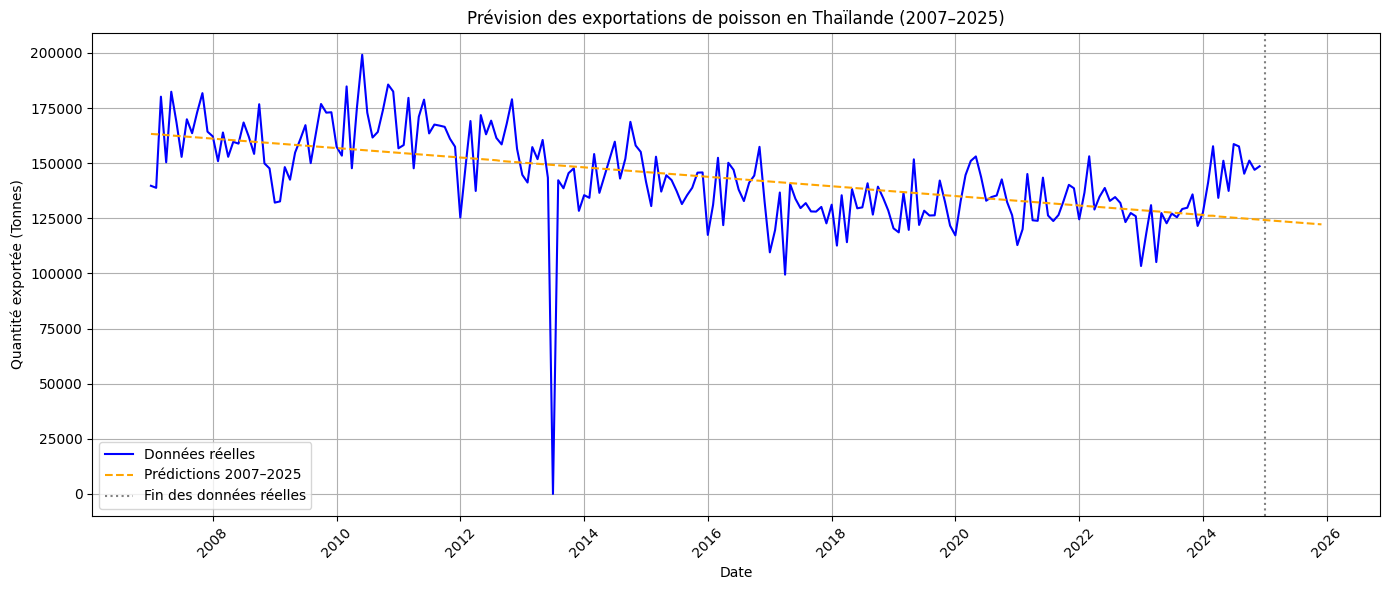

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
df = pd.read_csv("DATA/Export 2007-2024.csv")

# Créer une colonne datetime à partir de Year et Month
df['month'] = pd.to_datetime(df['Year (ค.ศ.)'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2))

# Trier les données par date
df = df.sort_values('month')

# Créer une variable temporelle numérique
df['month_num'] = (df['month'] - df['month'].min()) // pd.Timedelta('30D')

# Entraînement sur toutes les données disponibles
X = df[['month_num']]
y = df['Grand Total Quantity (Tons)']
model = LinearRegression()
model.fit(X, y)

# Générer des dates de 2007 à fin 2025
all_months = pd.date_range(start=df['month'].min(), end="2025-12-01", freq='MS')
all_month_nums = ((all_months - df['month'].min()) // pd.Timedelta('30D')).astype(int)
X_all = pd.DataFrame({'month_num': all_month_nums})

# Prédictions sur toute la période
y_all_pred = model.predict(X_all)

# Affichage
plt.figure(figsize=(14, 6))
plt.plot(df['month'], y, label="Données réelles", color='blue')
plt.plot(all_months, y_all_pred, label="Prédictions 2007–2025", linestyle="--", color='orange')
plt.axvline(x=pd.to_datetime("2024-12-31"), color='grey', linestyle=':', label='Fin des données réelles')
plt.xlabel("Date")
plt.ylabel("Quantité exportée (Tonnes)")
plt.title("Prévision des exportations de poisson en Thaïlande (2007–2025)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. Classification Models

We are testing several machine learning models:

* Logistic Regression
* SVM (Support Vector Machine)
* Decision Trees
* Random Forest
* K-Nearest Neighbors (KNN)

We will apply the same training method to the different models we are going to test and compare their performance.

### 2.1 Splitting the Dataset for Cross-Validation

We use 5-fold cross-validation with stratified sampling to evaluate model performance more reliably:
* The dataset is split into 5 distinct subsets of equal size.
* For each iteration, 80% of the data is used for training and the remaining 20% is used for testing, without overlap between test sets.
* This ensures that every data point is used exactly once for testing, allowing a more robust and generalized evaluation of the model.
* Stratified splitting ensures that each fold preserves the original class distribution, which is particularly important for imbalanced datasets.

In [2]:
# Cross-validation setup
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### 2.2 Training Classification Models

**1 - Model Training**

The model is created and trained on training data.

---

**2 - Prediction on the test set**

The model makes predictions on the test set to evaluate its performance.

--- 

**3 - Confusion Matrix**

Displays a table showing the number of ***correct and incorrect predictions***.

* Helps analyze ***classification errors***.
* Shows how many ***false positives and false negatives*** are produced.

---

**4 - Classification Report**

Displays the model evaluation metrics with `classification_report()`

* ***Precision***: Proportion of true positive predictions.
* ***Recall***: Ability to detect all positive classes.
* ***F1-score***: Harmonic mean between precision and recall.

---

**6 - AUC-ROC Score**

Calculates the area under the ROC curve, a global indicator of model quality.

* The closer the AUC is to ***1***, the better the model.
* An AUC of ***0.5*** means the model is ***predicting randomly***.

---

**7 - ROC curve**

Plots the ***ROC curve***, which shows the trade-off between the false positive rate and the true positive rate.

* Helps analyze the ***optimal classification threshold***.
* A curve close to the top-left corner indicates a ***good model***.

### 2.3 Applying the Models


=== Linear Regression ===

--- Fold 1 ---
MSE: 174991323.80465835
R²: 0.37789747869863677

--- Fold 2 ---
MSE: 765993237.0211895
R²: 0.07669633333310122

--- Fold 3 ---
MSE: 192562337.45176753
R²: 0.47995180997037756

--- Fold 4 ---
MSE: 203035541.0873305
R²: 0.49480894379224116

--- Fold 5 ---
MSE: 165935998.79631725
R²: 0.28566516429884736


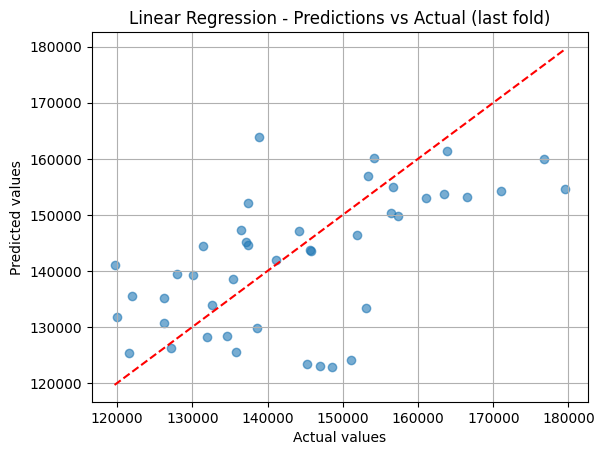


=== SVR ===

--- Fold 1 ---
MSE: 280674111.0248878
R²: 0.0021901181368551015

--- Fold 2 ---
MSE: 839087841.414646
R²: -0.011409557147728178

--- Fold 3 ---
MSE: 373046810.4061972
R²: -0.007477999671974933

--- Fold 4 ---
MSE: 402497433.3838016
R²: -0.0014901942936882406

--- Fold 5 ---
MSE: 233352752.89370403
R²: -0.004555983077225267


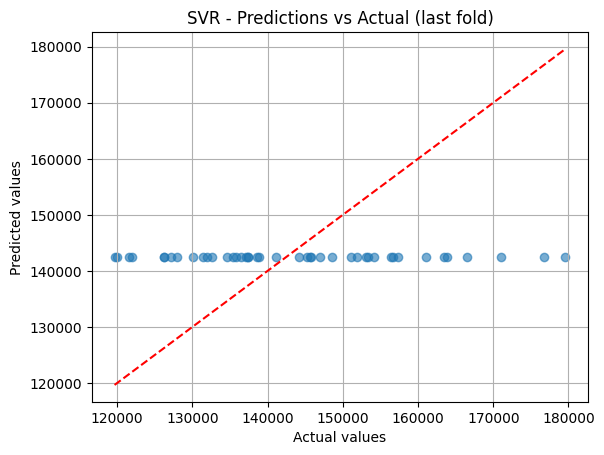


=== Decision Tree ===

--- Fold 1 ---
MSE: 642777275.8390455
R²: -1.2851039425307054

--- Fold 2 ---
MSE: 699192332.0714443
R²: 0.15721600047353124

--- Fold 3 ---
MSE: 273888557.17587674
R²: 0.2603161640327707

--- Fold 4 ---
MSE: 230680204.55211383
R²: 0.4260237613582215

--- Fold 5 ---
MSE: 251340218.2597093
R²: -0.08198989259722933


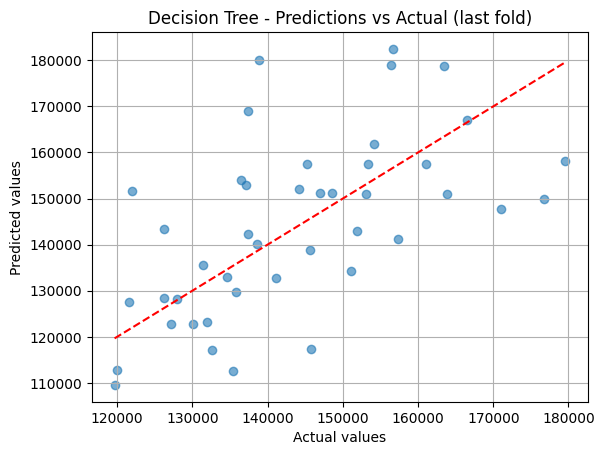


=== Random Forest ===

--- Fold 1 ---
MSE: 275042374.65422195
R²: 0.02221121015057559

--- Fold 2 ---
MSE: 675824689.6226976
R²: 0.1853826067978792

--- Fold 3 ---
MSE: 219159804.3155046
R²: 0.4081207100528046

--- Fold 4 ---
MSE: 197202134.48624614
R²: 0.509323569292333

--- Fold 5 ---
MSE: 155953240.7646251
R²: 0.32863975613028207


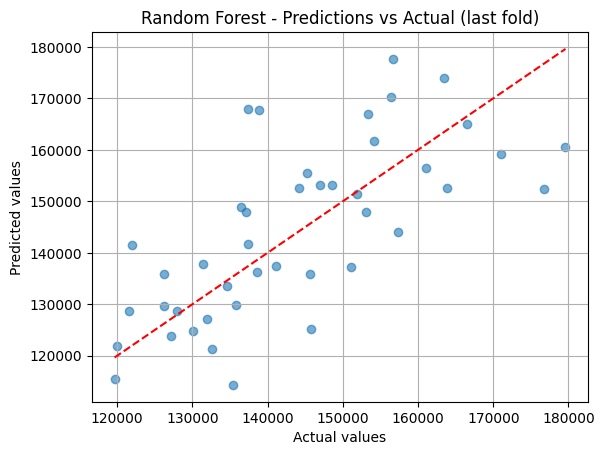


=== KNN ===

--- Fold 1 ---
MSE: 156993575.65013883
R²: 0.4418803337410505

--- Fold 2 ---
MSE: 682214964.6106673
R²: 0.17767997439560523

--- Fold 3 ---
MSE: 165233949.4327133
R²: 0.553756889996975

--- Fold 4 ---
MSE: 164813024.81986493
R²: 0.5899138365645544

--- Fold 5 ---
MSE: 91030841.53417416
R²: 0.6081230010199863


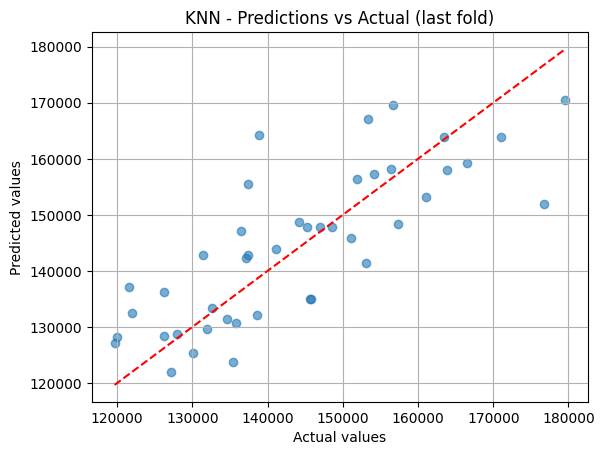


=== Summary of Results ===

Linear Regression
MSE mean: 300503687.6323
MSE std: 233106718.7415
R² mean: 0.3430
R² std: 0.1531

SVR
MSE mean: 425731789.8246
MSE std: 215513429.6469
R² mean: -0.0045
R² std: 0.0047

Decision Tree
MSE mean: 419575717.5796
MSE std: 206501251.0805
R² mean: -0.1047
R² std: 0.6128

Random Forest
MSE mean: 304636448.7687
MSE std: 189531846.5829
R² mean: 0.2907
R² std: 0.1710

KNN
MSE mean: 252057271.2095
MSE std: 216864983.8918
R² mean: 0.4743
R² std: 0.1591


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# Define your models
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store evaluation results
results = {}

# Loop over each model
for name, model in models.items():
    r2_scores = []
    mse_scores = []
    print(f"\n=== {name} ===")
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        r2_scores.append(r2)
        
        print(f"\n--- Fold {i+1} ---")
        print("MSE:", mse)
        print("R²:", r2)
        
        if i == kf.get_n_splits() - 1:  # Only plot the last fold
            plt.figure()
            plt.scatter(y_test, y_pred, alpha=0.6)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
            plt.xlabel("Actual values")
            plt.ylabel("Predicted values")
            plt.title(f"{name} - Predictions vs Actual (last fold)")
            plt.grid(True)
            plt.show()

    # Save results
    results[name] = {
        "MSE mean": np.mean(mse_scores),
        "MSE std": np.std(mse_scores),
        "R² mean": np.mean(r2_scores),
        "R² std": np.std(r2_scores),
    }

# Summary table
print("\n=== Summary of Results ===")
for name, res in results.items():
    print(f"\n{name}")
    for metric, value in res.items():
        print(f"{metric}: {value:.4f}")


RMSE CV: Moyenne = 16870.84, Écart-type = 8710.76


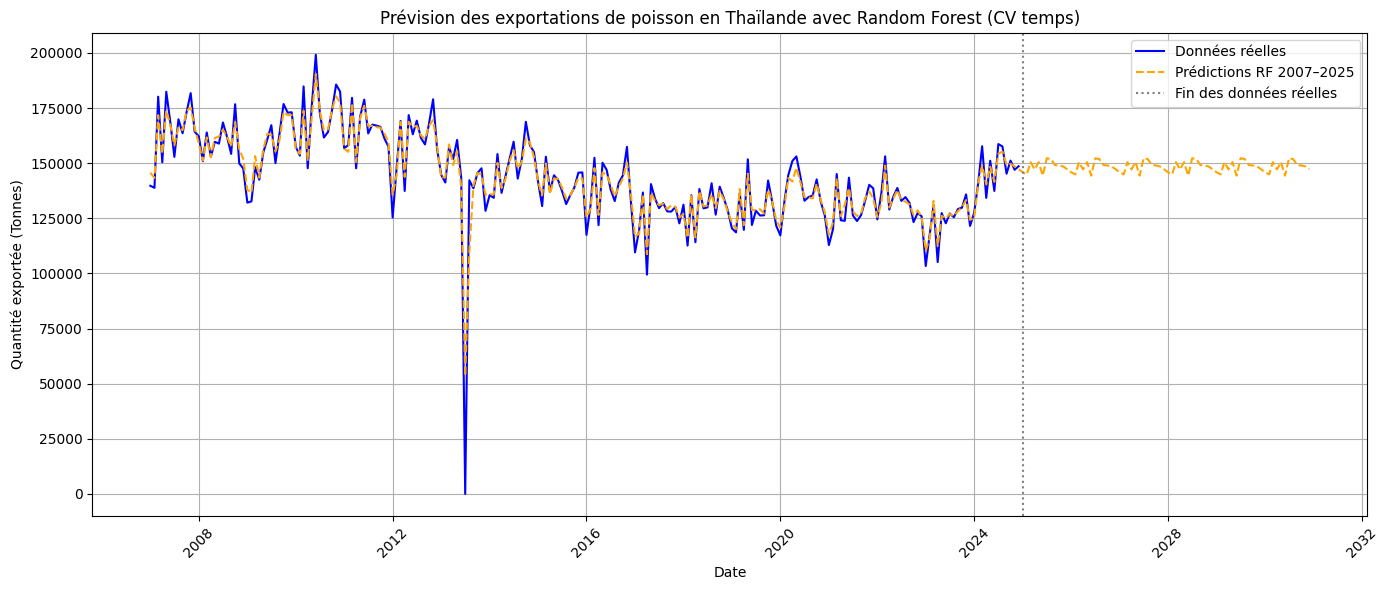

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Charger les données
df = pd.read_csv("DATA/Export 2007-2024.csv")

# Créer une colonne datetime à partir de Year et Month
df['month'] = pd.to_datetime(df['Year (ค.ศ.)'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2))

# Trier les données par date
df = df.sort_values('month')

# Créer une variable temporelle numérique (mois depuis le début)
df['month_num'] = (df['month'] - df['month'].min()) // pd.Timedelta('30D')
df['month'] = pd.to_datetime(df['Year (ค.ศ.)'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2))

# Définir features et cible
# Extraire le mois (1-12)
df['month_of_year'] = df['month'].dt.month

# Créer des variables cycliques
df['month_sin'] = np.sin(2 * np.pi * df['month_of_year'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_of_year'] / 12)

# Variables explicatives
X = df[['month_num', 'month_sin', 'month_cos']]  # sélectionner les colonnes par noms
y = df['Grand Total Quantity (Tons)'].values

# Initialiser le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Validation croisée temporelle
tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

print(f"RMSE CV: Moyenne = {np.mean(rmse_scores):.2f}, Écart-type = {np.std(rmse_scores):.2f}")

# Entraîner sur toutes les données maintenant
model.fit(X, y)

# all_months déjà créé :
all_months = pd.date_range(start=df['month'].min(), end="2030-12-01", freq='MS')

# Calculer month_num pour all_months
all_month_nums = ((all_months - df['month'].min()) // pd.Timedelta('30D')).astype(int)

# Extraire le mois (1-12) pour all_months
all_month_of_year = all_months.month

# Créer les variables cycliques pour all_months
all_month_sin = np.sin(2 * np.pi * all_month_of_year / 12)
all_month_cos = np.cos(2 * np.pi * all_month_of_year / 12)

# Créer DataFrame X_all avec les 3 features
X_all = pd.DataFrame({
    'month_num': all_month_nums,
    'month_sin': all_month_sin,
    'month_cos': all_month_cos
})

# Prédictions sur toute la période
y_all_pred = model.predict(X_all)

# Affichage
plt.figure(figsize=(14, 6))
plt.plot(df['month'], y, label="Données réelles", color='blue')
plt.plot(all_months, y_all_pred, label="Prédictions RF 2007–2025", linestyle="--", color='orange')
plt.axvline(x=pd.to_datetime("2024-12-31"), color='grey', linestyle=':', label='Fin des données réelles')
plt.xlabel("Date")
plt.ylabel("Quantité exportée (Tonnes)")
plt.title("Prévision des exportations de poisson en Thaïlande avec Random Forest (CV temps)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



=== Linear Regression ===

--- Fold 1 ---
RMSE: 18448.9462
R²: -0.7483

--- Fold 2 ---
RMSE: 35632.2656
R²: -0.9455

--- Fold 3 ---
RMSE: 12705.2953
R²: -0.1459

--- Fold 4 ---
RMSE: 14450.7028
R²: -0.9161

--- Fold 5 ---
RMSE: 20115.2181
R²: -1.3560


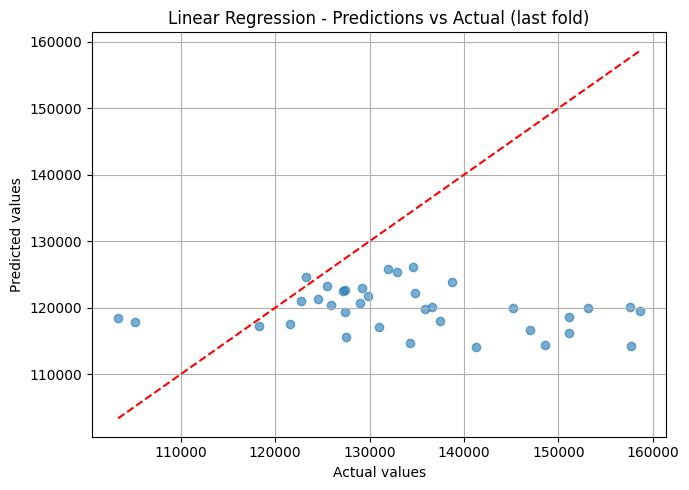


=== SVR ===

--- Fold 1 ---
RMSE: 14413.1923
R²: -0.0670

--- Fold 2 ---
RMSE: 33852.5513
R²: -0.7560

--- Fold 3 ---
RMSE: 28037.2556
R²: -4.5802

--- Fold 4 ---
RMSE: 20901.6142
R²: -3.0086

--- Fold 5 ---
RMSE: 16763.0590
R²: -0.6362


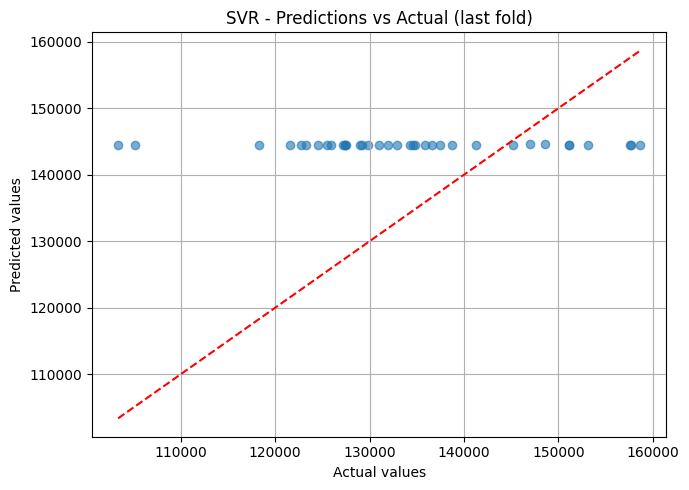


=== Decision Tree ===

--- Fold 1 ---
RMSE: 17286.9502
R²: -0.5350

--- Fold 2 ---
RMSE: 39661.3406
R²: -1.4104

--- Fold 3 ---
RMSE: 15744.3147
R²: -0.7597

--- Fold 4 ---
RMSE: 11794.5662
R²: -0.2764

--- Fold 5 ---
RMSE: 15779.4401
R²: -0.4498


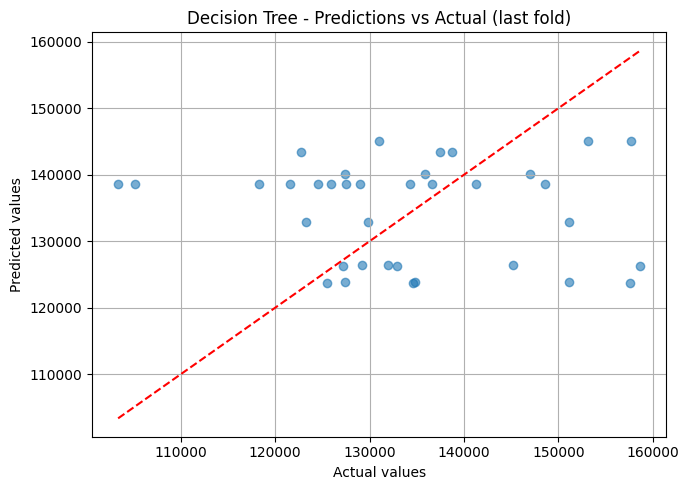


=== Random Forest ===

--- Fold 1 ---
RMSE: 12404.9161
R²: 0.2096

--- Fold 2 ---
RMSE: 34072.4326
R²: -0.7789

--- Fold 3 ---
RMSE: 14994.3047
R²: -0.5960

--- Fold 4 ---
RMSE: 10711.2475
R²: -0.0527

--- Fold 5 ---
RMSE: 12171.3011
R²: 0.1374


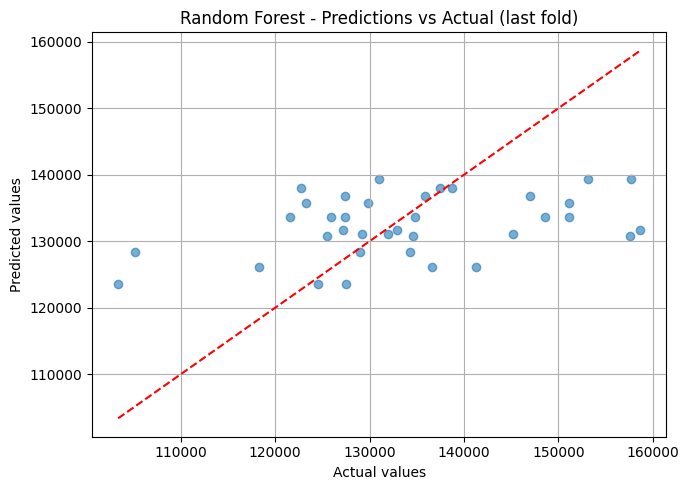


=== KNN ===

--- Fold 1 ---
RMSE: 14137.1460
R²: -0.0266

--- Fold 2 ---
RMSE: 34766.3812
R²: -0.8521

--- Fold 3 ---
RMSE: 14238.5627
R²: -0.4392

--- Fold 4 ---
RMSE: 10622.5288
R²: -0.0354

--- Fold 5 ---
RMSE: 13213.8762
R²: -0.0167


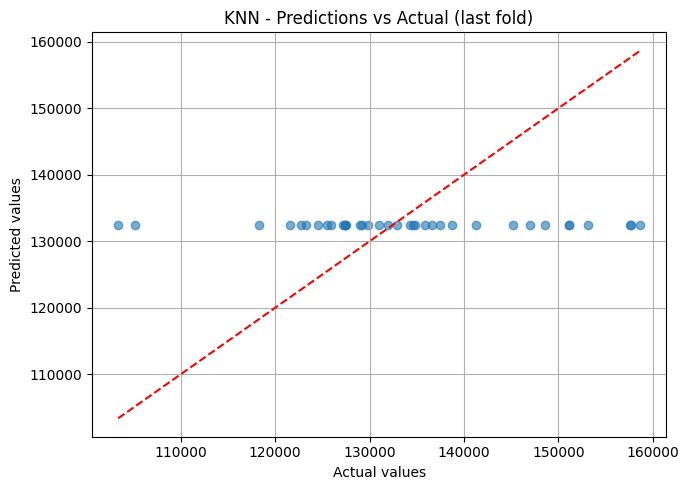


=== Summary of Results ===
                    RMSE mean   RMSE std  R² mean  R² std
Linear Regression  20270.4856  8129.3096  -0.8224  0.3929
SVR                22793.5345  7210.7503  -1.8096  1.7110
Decision Tree      20053.3224  9971.6384  -0.6862  0.3941
Random Forest      16870.8404  8710.7622  -0.2161  0.3985
KNN                17395.6990  8782.8213  -0.2740  0.3304


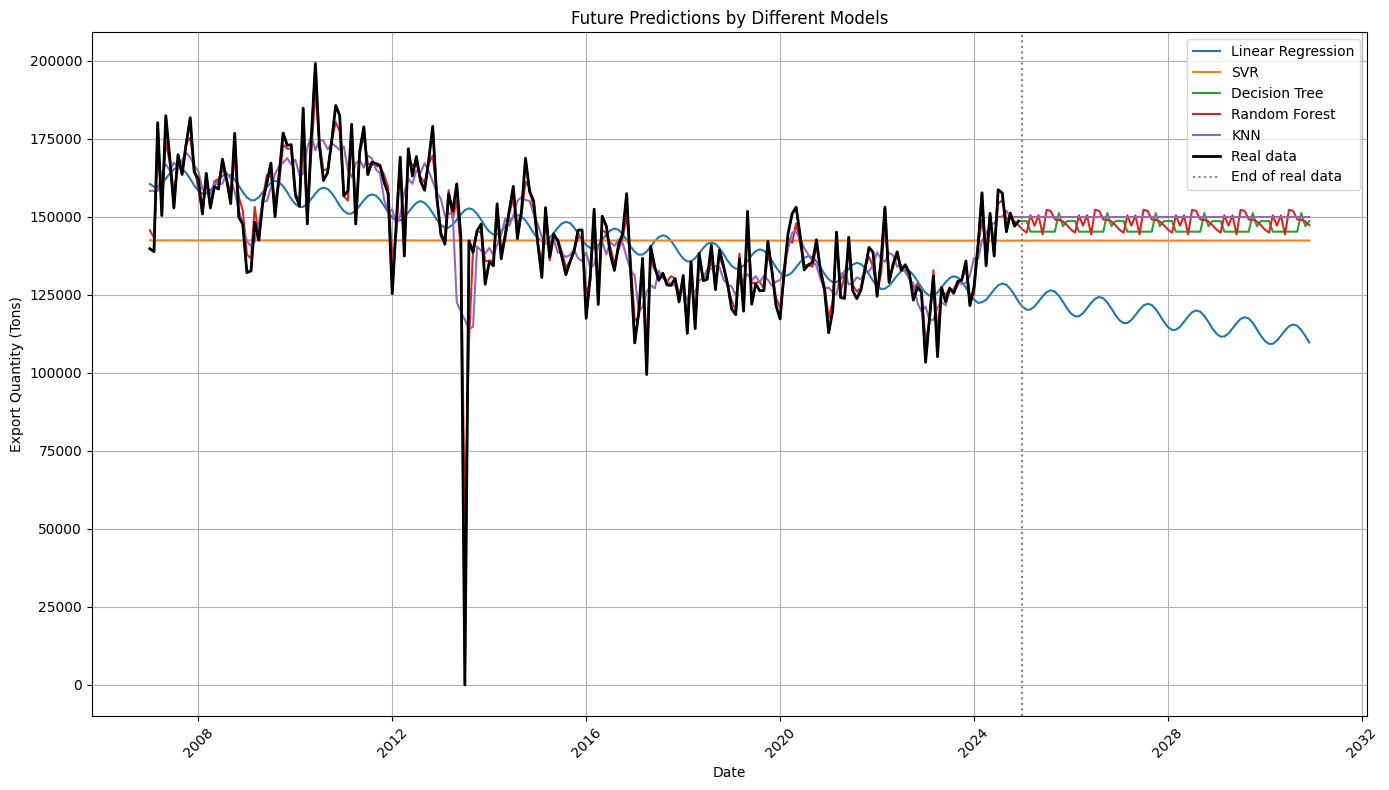

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

# --- Chargement et préparation des données ---

df = pd.read_csv("DATA/Export 2007-2024.csv")

df['month'] = pd.to_datetime(df['Year (ค.ศ.)'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2))
df = df.sort_values('month')
df['month_num'] = (df['month'] - df['month'].min()) // pd.Timedelta('30D')
df['month_of_year'] = df['month'].dt.month

# Variables cycliques pour gérer la saisonnalité
df['month_sin'] = np.sin(2 * np.pi * df['month_of_year'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_of_year'] / 12)

X = df[['month_num', 'month_sin', 'month_cos']]
y = df['Grand Total Quantity (Tons)'].values

# --- Modèles à tester ---

models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

tscv = TimeSeriesSplit(n_splits=5)

results = {}

for name, model in models.items():
    rmse_scores = []
    r2_scores = []
    print(f"\n=== {name} ===")
    
    for i, (train_index, val_index) in enumerate(tscv.split(X)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        rmse = sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)
        
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        
        print(f"\n--- Fold {i+1} ---")
        print(f"RMSE: {rmse:.4f}")
        print(f"R²: {r2:.4f}")
        
        if i == tscv.get_n_splits() - 1:  # Plot last fold predictions
            plt.figure(figsize=(7,5))
            plt.scatter(y_val, y_pred, alpha=0.6)
            plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
            plt.xlabel("Actual values")
            plt.ylabel("Predicted values")
            plt.title(f"{name} - Predictions vs Actual (last fold)")
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    
    results[name] = {
        "RMSE mean": np.mean(rmse_scores),
        "RMSE std": np.std(rmse_scores),
        "R² mean": np.mean(r2_scores),
        "R² std": np.std(r2_scores)
    }

# --- Résumé des résultats ---

import pandas as pd

summary_df = pd.DataFrame(results).T.round(4)

print("\n=== Summary of Results ===")
print(summary_df)

# --- Prédiction future sur toutes les données ---

all_months = pd.date_range(start=df['month'].min(), end="2030-12-01", freq='MS')
all_month_nums = ((all_months - df['month'].min()) // pd.Timedelta('30D')).astype(int)
all_month_of_year = all_months.month
all_month_sin = np.sin(2 * np.pi * all_month_of_year / 12)
all_month_cos = np.cos(2 * np.pi * all_month_of_year / 12)

X_all = pd.DataFrame({
    'month_num': all_month_nums,
    'month_sin': all_month_sin,
    'month_cos': all_month_cos
})

plt.figure(figsize=(14, 8))

for name, model in models.items():
    # Re-train model on all data
    model.fit(X, y)
    y_all_pred = model.predict(X_all)
    
    plt.plot(all_months, y_all_pred, label=name)

plt.plot(df['month'], y, label="Real data", color='black', linewidth=2)
plt.axvline(x=pd.to_datetime("2024-12-31"), color='grey', linestyle=':', label='End of real data')
plt.xlabel("Date")
plt.ylabel("Export Quantity (Tons)")
plt.title("Future Predictions by Different Models")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
